## Nearest Centroid Classifier (Clasificador Euclideano)

Es un algoritmo de aprendizaje supervisado. Este algoritmo consiste en **"condensar"** la información del conjunto de entrenamiento en **centroides (centros de nubes de puntos)** para hacer predicciones a nuevos patrones, **asignando cada nuevo patron al centroide más cercano**. 

**Un centroide es el centro geométrico de un conjunto de datos, éste algoritmo utiliza la media para calcular el centro geométrico. En múltiples dimensiones, este sería el valor medio a lo largo de cada dimensión, formando un punto de centro de la distribución a través de cada variable.**

El algoritmo asume que los centroides en el espacio de características (atributos) de entrada son diferentes para cada etiqueta de destino, es decir, que **no existen dos o más centroides iguales para una etiqueta**.

**Los centroides "representan" el modelo. Dados nuevos patrones se calcula la distancia entre cada patron y cada centroide y se usa el centroide más cercano para hacer la predicción.**

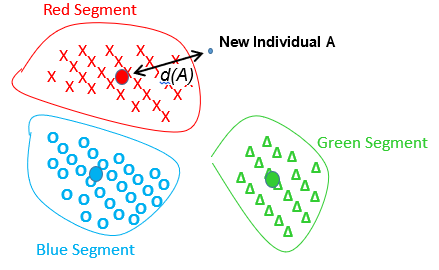

_**Documentacion:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets
from sklearn import datasets

# Procesamiento
from sklearn.preprocessing import MinMaxScaler

# Separación train y test
from sklearn.model_selection import train_test_split

# Modelo
from sklearn.neighbors import NearestCentroid

# Métricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### **SEPARACIÓN  TRAIN Y TEST**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (105, 4), y_train: (105,)
X_test: (45, 4),  y_test: (45,)


### **PROCESAMIENTO**

In [4]:
# Normalización de datos
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

### **MODELO**

In [6]:
# NearestCentroid

model = NearestCentroid(metric = "euclidean")

model.fit(X_train, y_train)

NearestCentroid()

### **PREDICCIONES**

In [9]:
yhat = model.predict(X_test)

### **MÉTRICAS**

In [10]:
print("Similitud (JACCARD INDEX):", jaccard_score(y_test, yhat, average = "macro"))
print("Exactitud (ACURACY):"    , accuracy_score(y_test, yhat))
print("Precisión (PRECISION):"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad (RECALL):" , recall_score(y_test, yhat, average = "macro"))
print("F1-score (PRECISION + RECALL):"     , f1_score(y_test, yhat, average = "macro"))

Similitud (JACCARD INDEX): 0.9042735042735043
Exactitud (ACURACY): 0.9555555555555556
Precisión (PRECISION): 0.9555555555555556
Sensibilidad (RECALL): 0.9487179487179488
F1-score (PRECISION + RECALL): 0.9484126984126983


### **CONFUSION MATRIX**

In [11]:
confusion_matrix(y_test, yhat, labels = [0, 1, 2])

array([[19,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 13]], dtype=int64)

### **Classification Report**

In [12]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     0.846     0.917        13
           2      0.867     1.000     0.929        13

    accuracy                          0.956        45
   macro avg      0.956     0.949     0.948        45
weighted avg      0.961     0.956     0.955        45



### **Atributos del Modelo**

In [13]:
# .centroids_ retorna un array con los centroides del modelo, uno por cada clase. 

model.centroids_

array([[0.19544592, 0.62609971, 0.06509217, 0.06182796],
       [0.45945946, 0.32923833, 0.55550193, 0.50112613],
       [0.6645469 , 0.44840295, 0.79391892, 0.79391892]])

In [14]:
# .classes_ retorna las etiquetas de la variable objetivo

model.classes_

array([0, 1, 2])

In [15]:
# .n_features_in_ retorna el número de atributos (columnas) de los centroides

model.n_features_in_

4

### **Centroides y nubes de puntos**

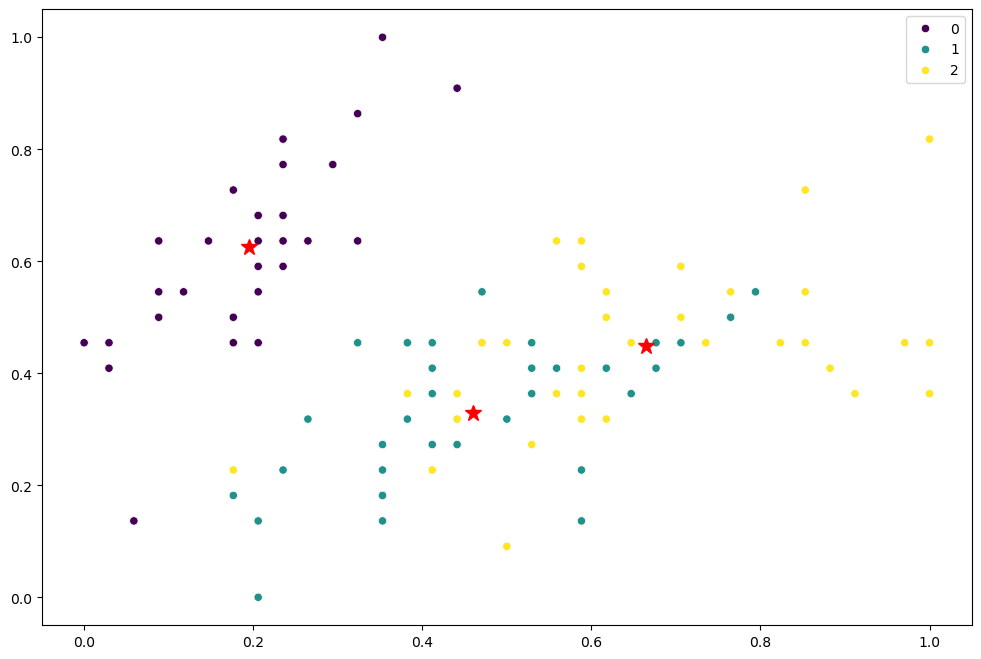

In [19]:
a, b = 0, 1

plt.figure(figsize = (12, 8))

sns.scatterplot(x = X_train[:, a], y = X_train[:, b], hue = y_train, palette = "viridis")

plt.plot(model.centroids_[0][a], model.centroids_[0][b], marker = "*", markersize = 12, color = "red")
plt.plot(model.centroids_[1][a], model.centroids_[1][b], marker = "*", markersize = 12, color = "red")
plt.plot(model.centroids_[2][a], model.centroids_[2][b], marker = "*", markersize = 12, color = "red")

plt.show()

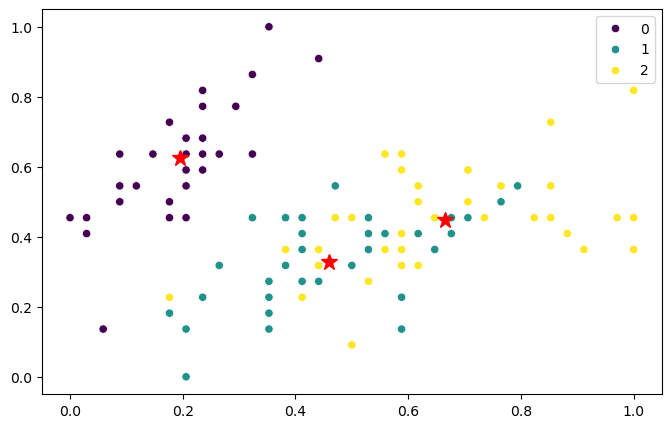

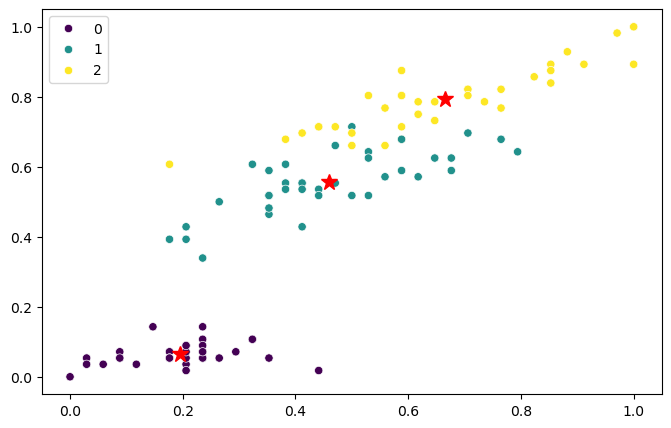

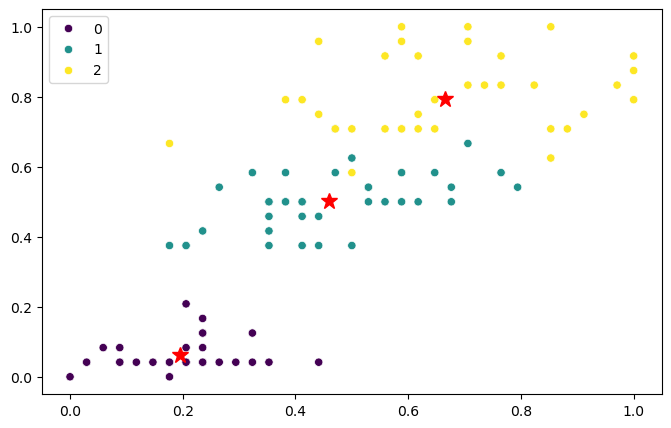

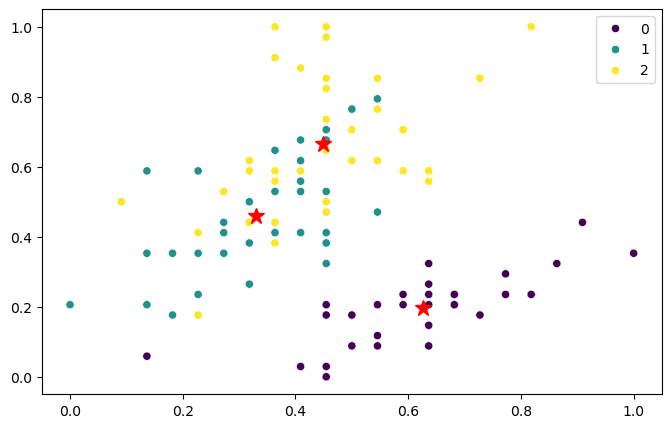

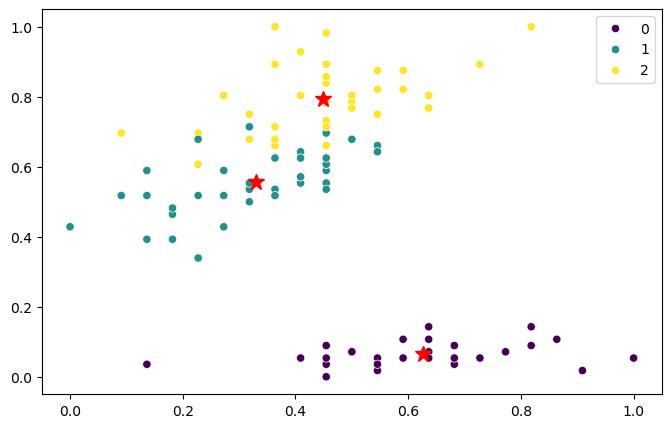

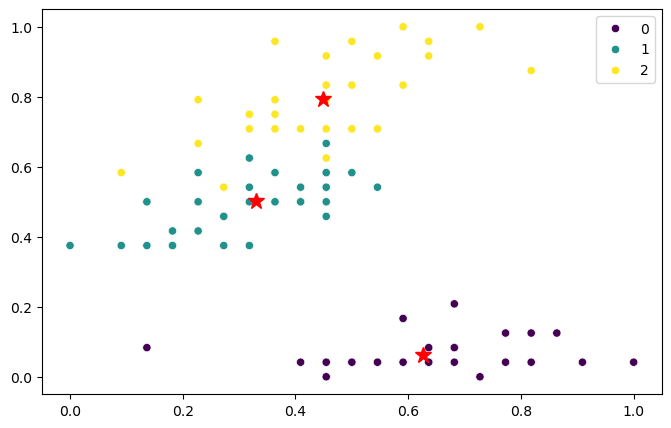

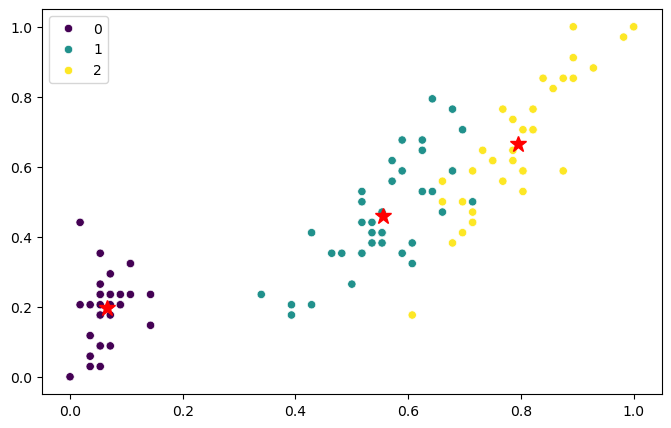

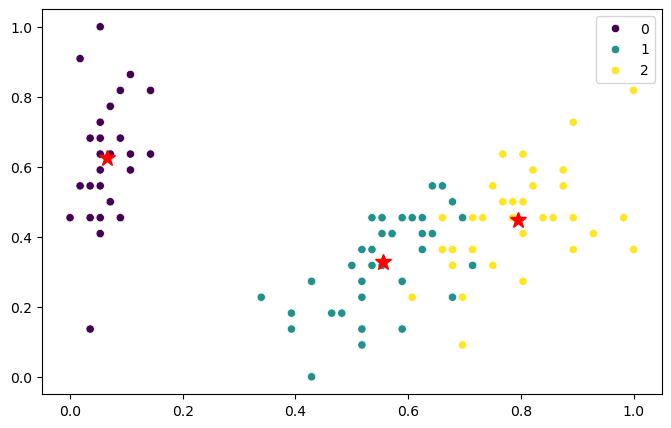

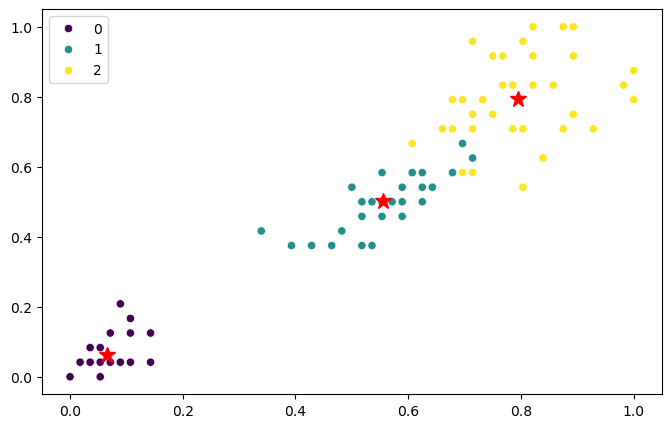

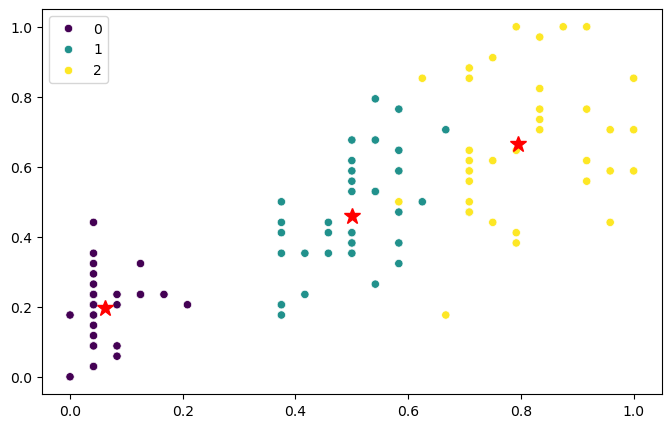

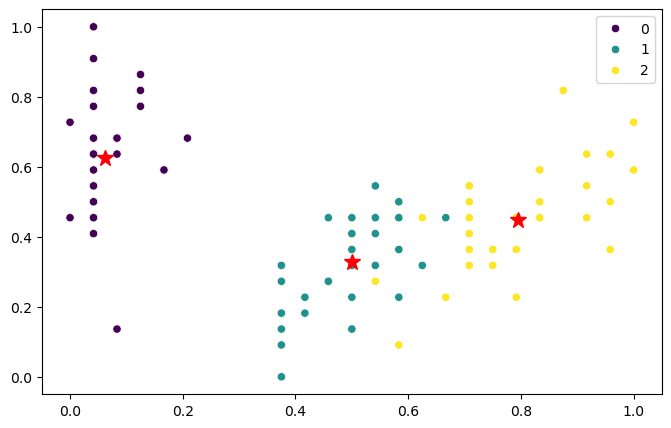

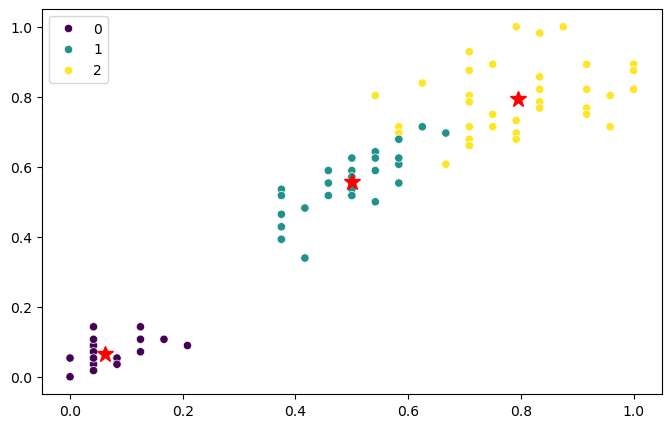

In [20]:
for i in range(4):
    for j in range(4):
        if i != j:

            plt.figure(figsize = (8, 5))

            sns.scatterplot(x = X_train[:, i], y = X_train[:, j], hue = y_train, palette = "viridis")

            plt.plot(model.centroids_[0][i], model.centroids_[0][j], marker = "*", markersize = 12, color = "red")
            plt.plot(model.centroids_[1][i], model.centroids_[1][j], marker = "*", markersize = 12, color = "red")
            plt.plot(model.centroids_[2][i], model.centroids_[2][j], marker = "*", markersize = 12, color = "red")

            plt.show()

In [ ]:
################################################################################################################################

### Ejercicio 1: 
- Utiliza el dataset del titanic para practicar **`NearestCentroid`**:

In [35]:
df = pd.read_csv("../Data/titcanica.csv")
backup = df
df.shape

(891, 10)

In [36]:
df

,PassengerId,Name,Sex,Age,Pclass,Ticket,Fare,Surname,Title,Survived
0,446,"Dodge, Master. Washington",1,4,1,33638,81.8583,1,0,1
1,651,"Mitkoff, Mr. Mito",1,29,3,349221,7.8958,1,2,0
2,173,"Johnson, Miss. Eleanor Ileen",0,1,3,347742,11.1333,3,1,1
3,451,"West, Mr. Edwy Arthur",1,36,2,C.A. 34651,27.7500,3,2,0
4,315,"Hart, Mr. Benjamin",1,43,2,F.C.C. 13529,26.2500,3,2,0
...,...,...,...,...,...,...,...,...,...,...
886,822,"Lulic, Mr. Nikola",1,27,3,315098,8.6625,1,2,1
887,634,"Parr, Mr. William Henry Marsh",1,29,1,112052,0.0000,1,2,0
888,457,"Millet, Mr. Francis Davis",1,65,1,13509,26.5500,1,2,0
889,501,"Calic, Mr. Petar",1,17,3,315086,8.6625,1,2,0


In [37]:
X = np.array(df[['Sex', 'Age', 'Pclass', 'Fare', 'Surname', 'Title']])
y = np.array(df["Survived"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (623, 6), y_train: (623,)
X_test: (268, 6),  y_test: (268,)


In [38]:
model = NearestCentroid(metric = "euclidean")
model.fit(X_train, y_train)

yhat = model.predict(X_test)

In [39]:
print("Similitud (JACCARD INDEX):", jaccard_score(y_test, yhat, average = "macro"))
print("Exactitud (ACURACY):"    , accuracy_score(y_test, yhat))
print("Precisión (PRECISION):"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad (RECALL):" , recall_score(y_test, yhat, average = "macro"))
print("F1-score (PRECISION + RECALL):"     , f1_score(y_test, yhat, average = "macro"))

Similitud (JACCARD INDEX): 0.48413107764252805
Exactitud (ACURACY): 0.6828358208955224
Precisión (PRECISION): 0.644905175184828
Sensibilidad (RECALL): 0.6392045454545454
F1-score (PRECISION + RECALL): 0.6415026045355114


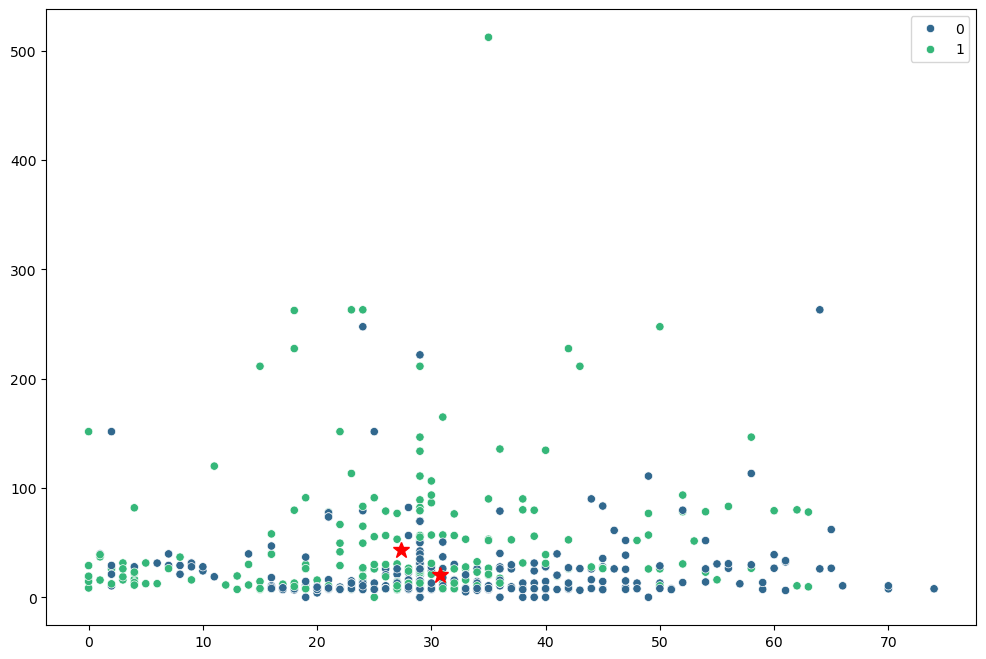

In [41]:
a, b = 1, 3

plt.figure(figsize = (12, 8))

sns.scatterplot(x = X_train[:, a], y = X_train[:, b], hue = y_train, palette = "viridis")

plt.plot(model.centroids_[0][a], model.centroids_[0][b], marker = "*", markersize = 12, color = "red")
plt.plot(model.centroids_[1][a], model.centroids_[1][b], marker = "*", markersize = 12, color = "red")

plt.show()

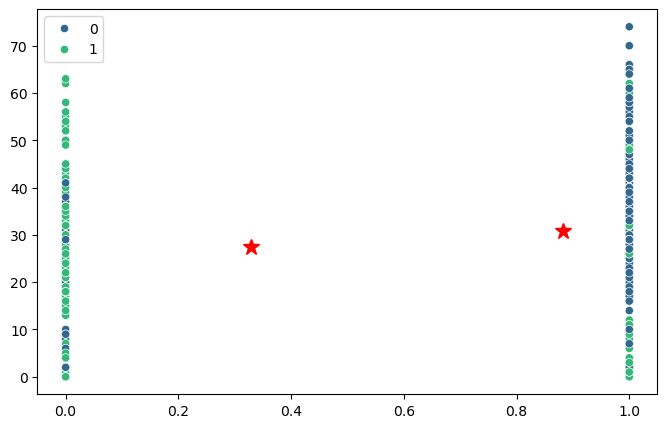

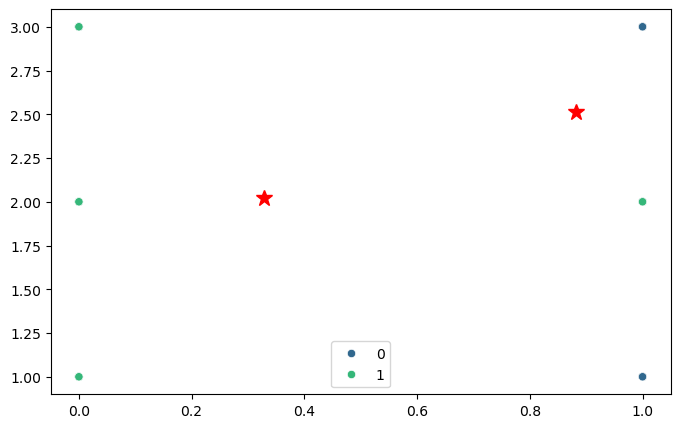

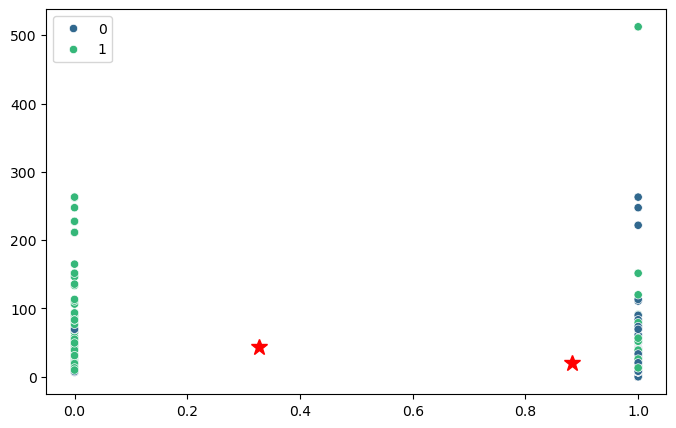

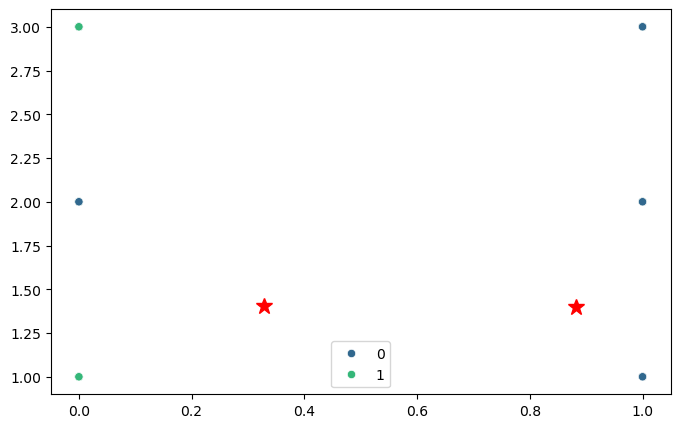

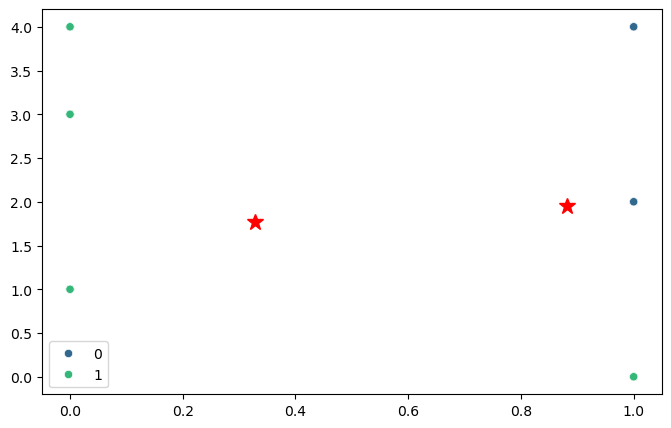

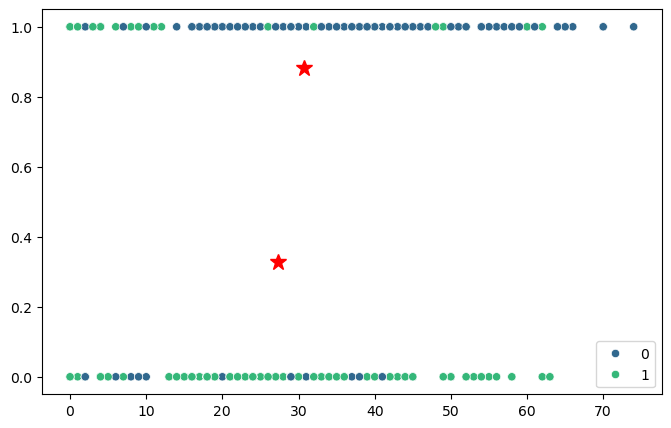

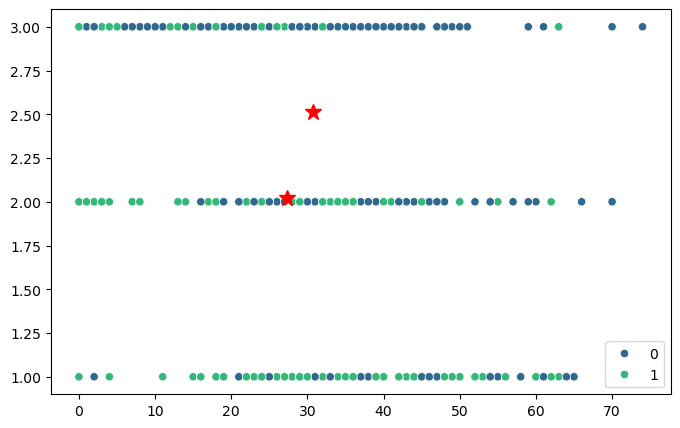

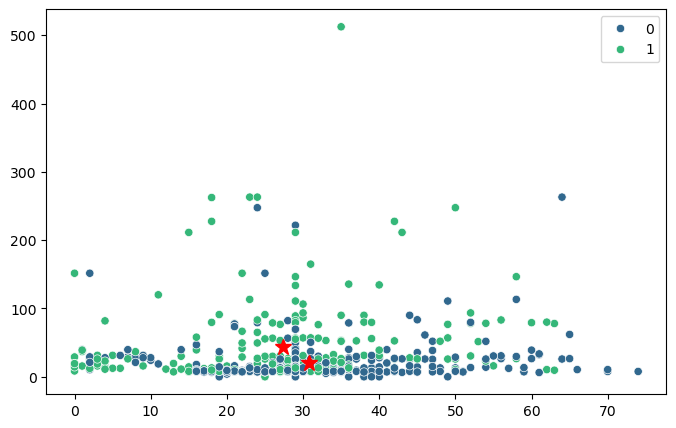

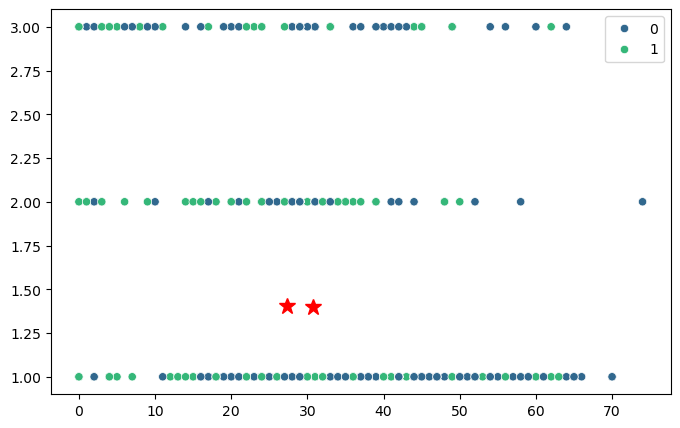

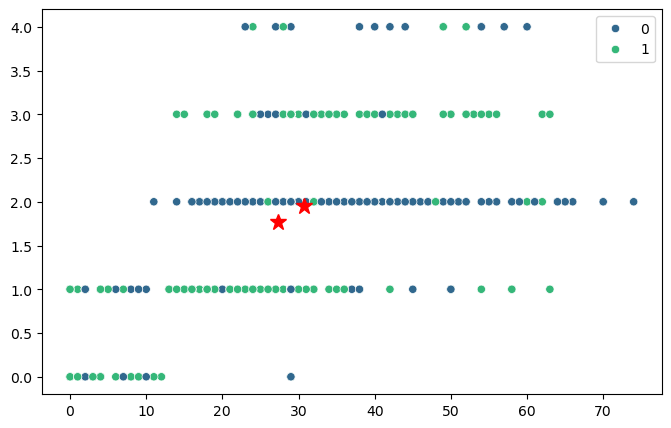

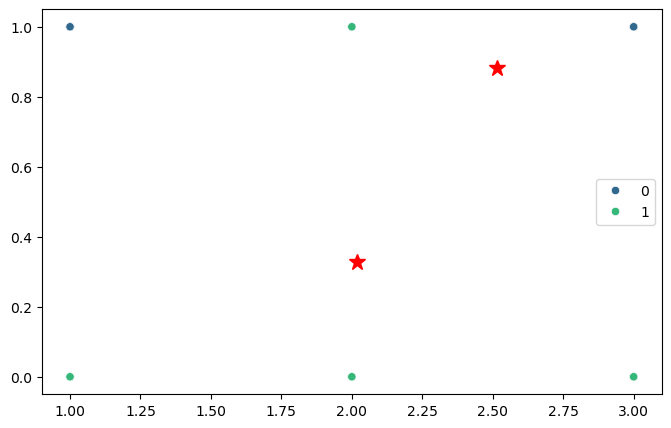

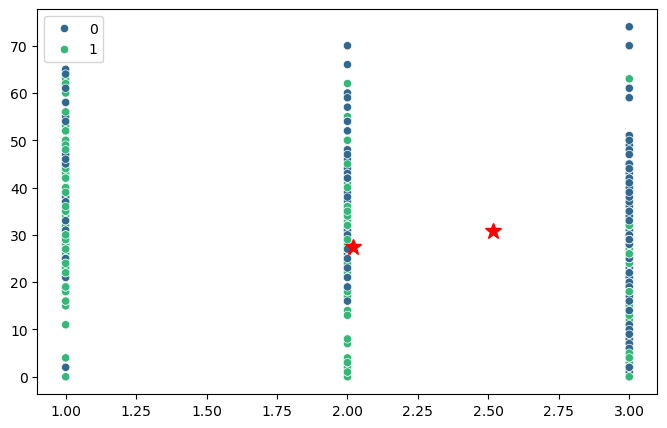

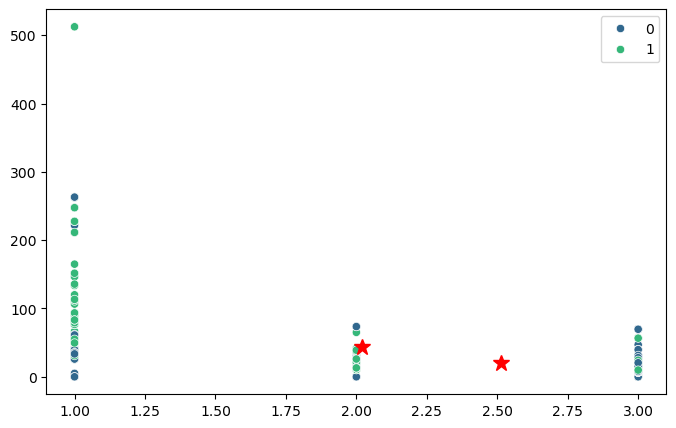

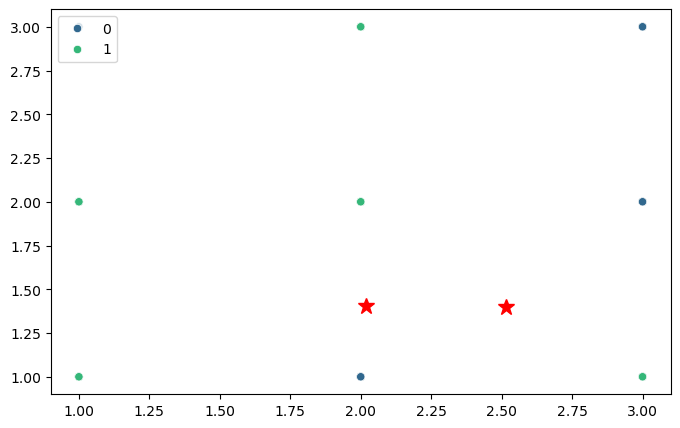

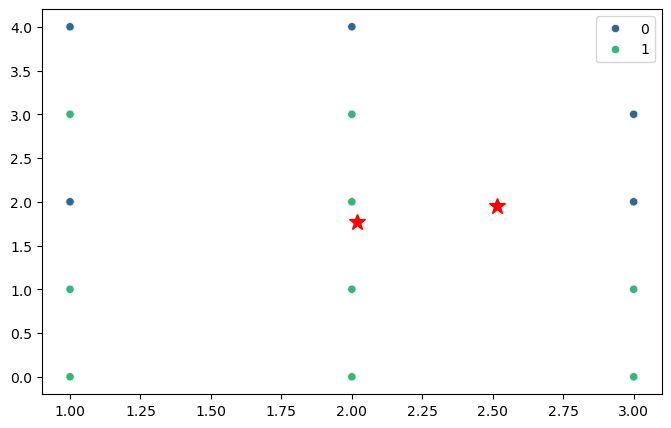

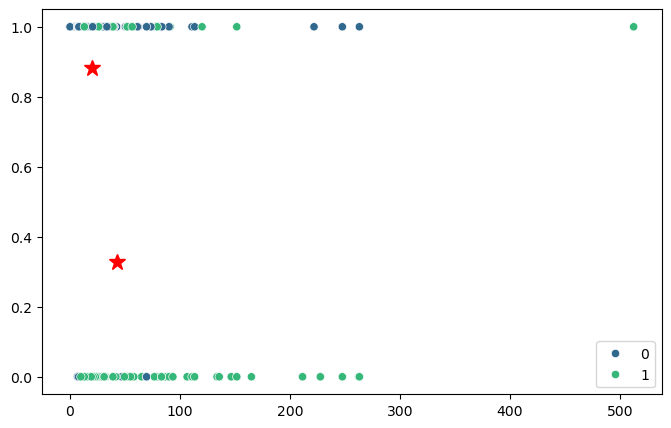

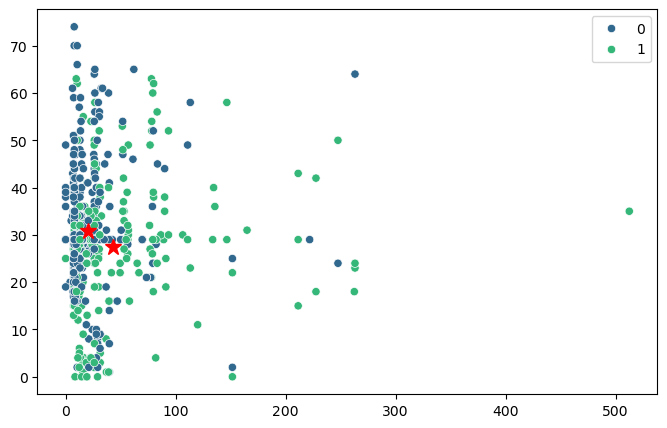

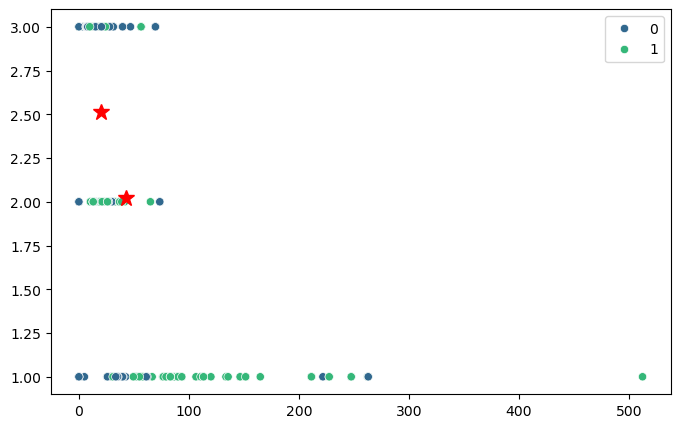

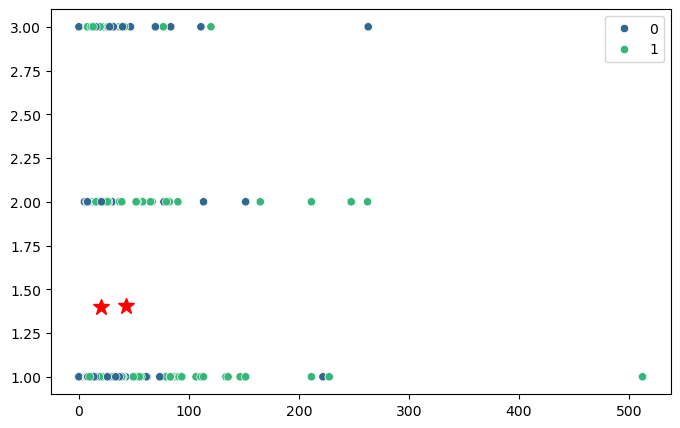

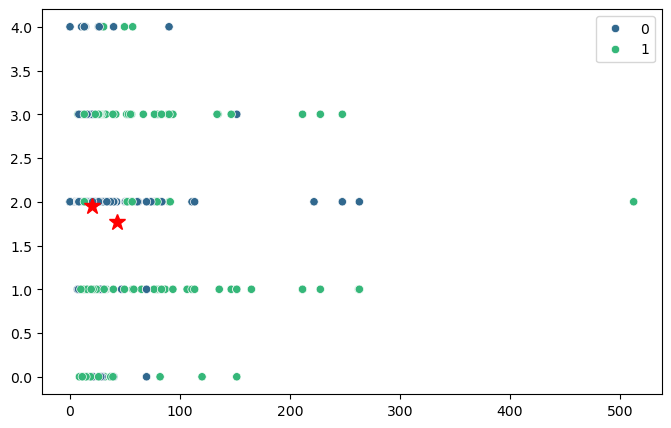

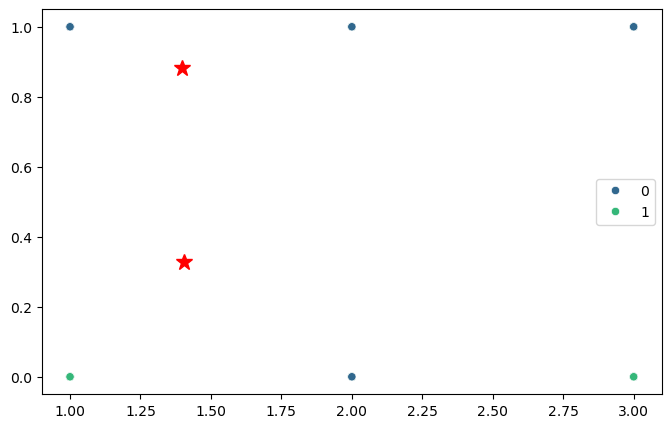

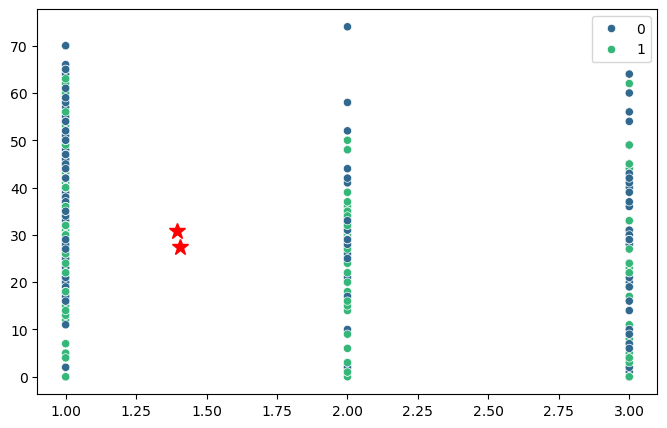

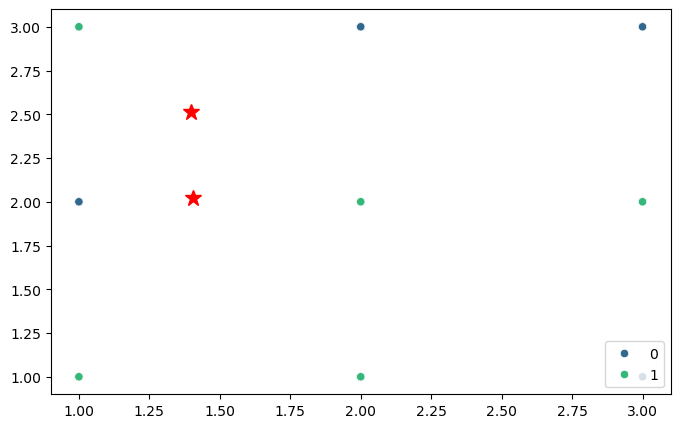

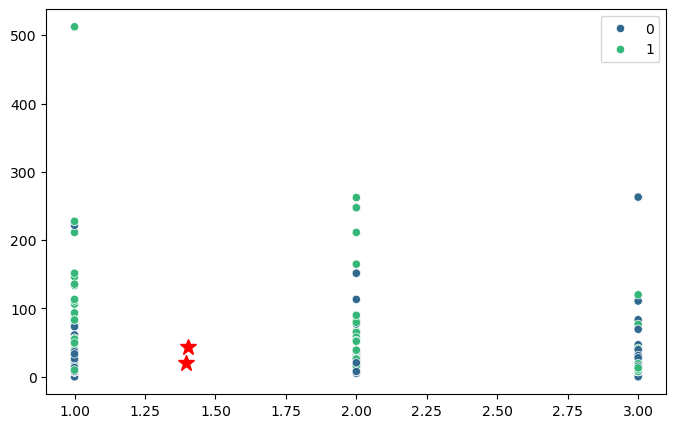

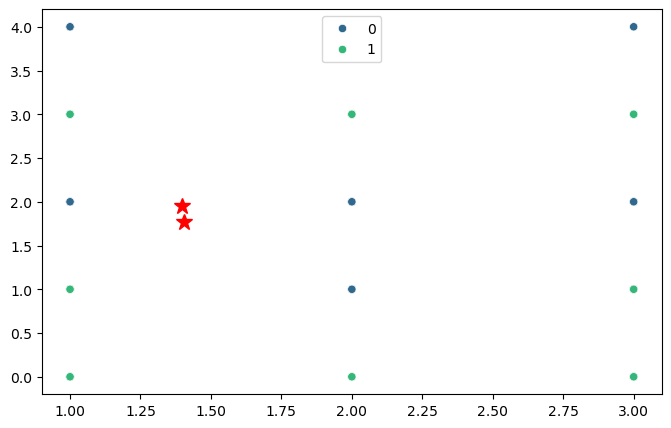

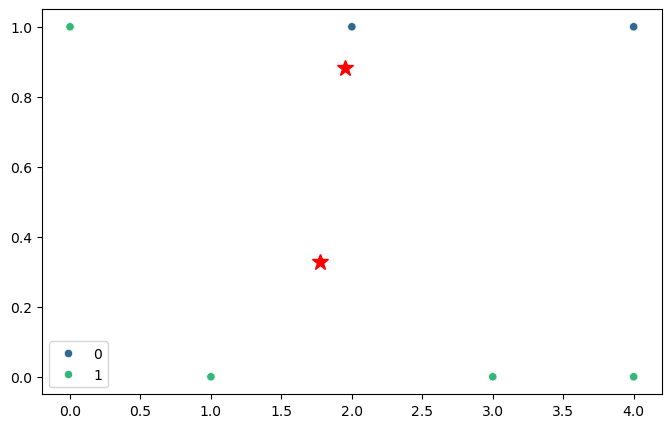

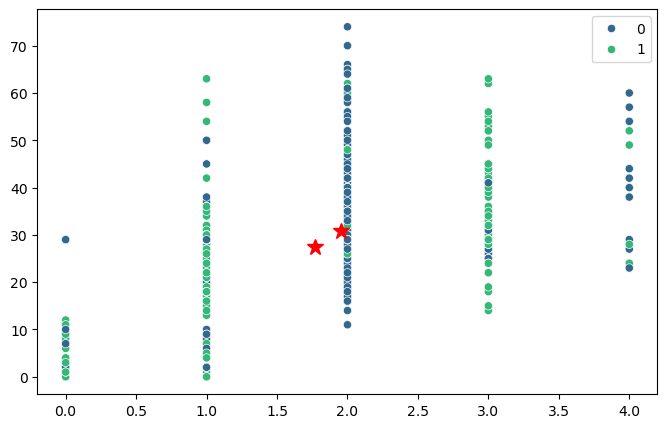

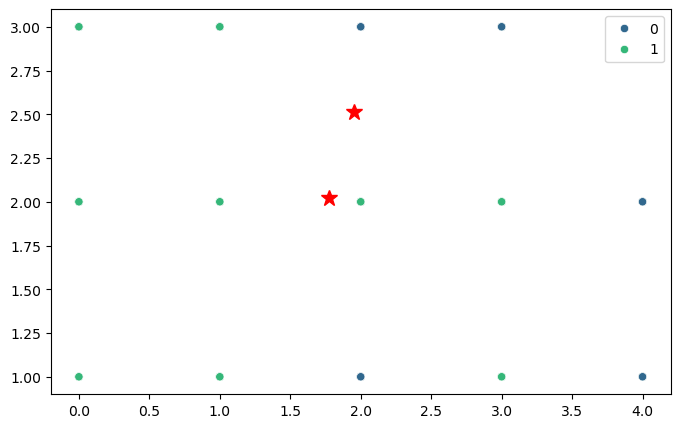

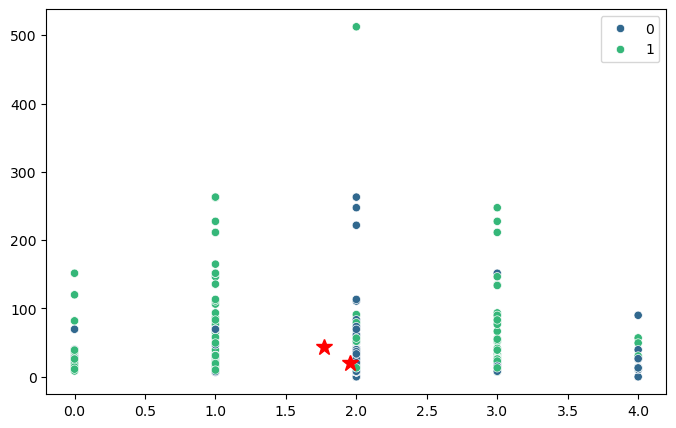

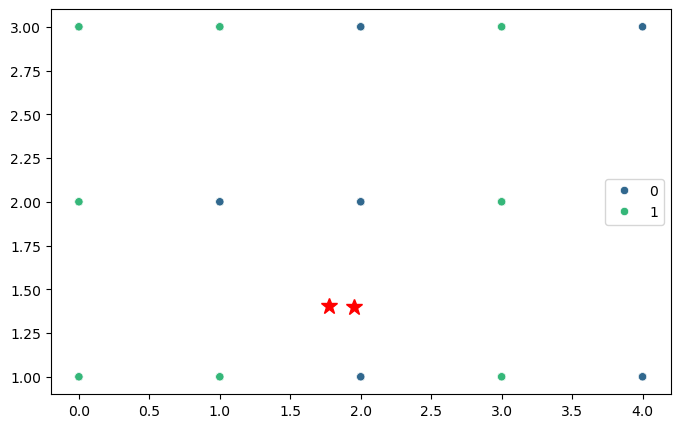

In [40]:
for i in range(6):
    for j in range(6):
        if i != j:

            plt.figure(figsize = (8, 5))

            sns.scatterplot(x = X_train[:, i], y = X_train[:, j], hue = y_train, palette = "viridis")

            plt.plot(model.centroids_[0][i], model.centroids_[0][j], marker = "*", markersize = 12, color = "red")
            plt.plot(model.centroids_[1][i], model.centroids_[1][j], marker = "*", markersize = 12, color = "red")

            plt.show()

### **Ejercicio 2:**
- Intenta recrear el algormito de **`NearestCentroid`**:
1. Sea **`x`** un patron de prueba a clasificar.
2. Se calculan los **`n-centroides`** (uno para cada clase).
3. Se calcula la distancia entre los **`n-centroides`** y el patron.
5. Asigna la clase del centroide más cercano al nuevo patron.
6. Repite el algoritmo con otra formula de distancia.

In [48]:
class NearestCentroidClassifier_ana:
    def __init__(self):
        self.centroids = None # Este atributo almacenará los centroides calculados durante el entrenamiento.

    def fit(self, X, y): # X es el conjunto de datos de entrenamiento y y son las etiquetas de clase
        # Identificamos las clases únicas en las etiquetas y contamos cuántas clases distintas hay.
        unique_classes = np.unique(y)
        num_classes = len(unique_classes) 

        # Inicializar los centroides como una matriz de ceros con dimensiones (número de clases, número de características).
        self.centroids = np.zeros((num_classes, X.shape[1]))

        # Calculamos el centroide para cada clase, tomando la media de las características para las instancias de esa clase.
        for i, cls in enumerate(unique_classes):
            # filtrando X por los indices donde y sea igual a una misma clase
            class_data = X[y == cls]
            class_centroid = np.mean(class_data, axis=0)
            self.centroids[i] = class_centroid # añadiendo a la fila de la matriz de cada clase sus centroides por cada caracteristica

    def predict(self, X, distance_metric='euclidean'):
        # Verificamos si el clasificador ha sido entrenado antes de realizar predicciones.
        if self.centroids is None:
            raise ValueError("El clasificador no ha sido entrenado. Por favor, utiliza el método 'fit' primero.")

        # Calcular la distancia entre los centroides y el conjunto de datos de prueba  con dimensiones 
        # Inicializamos una matriz para almacenar las distancias entre los centroides y las instancias del conjunto de datos de prueba.
        # (número de instancias de prueba, número de centroides)
        distances = np.zeros((X.shape[0], len(self.centroids)))

        # X - centroid realiza la resta elemento a elemento entre X y el centroide actual. 
        # Luego, np.linalg.norm(..., axis=1) calcula la norma (longitud) de cada vector resultante a lo largo del eje 1 (a lo largo de las columnas).
        # distances[:, i]: Esto actualiza la columna i en la matriz distances con las distancias calculadas.
        for i, centroid in enumerate(self.centroids):
            if distance_metric == 'euclidean':
                distances[:, i] = np.linalg.norm(X - centroid, axis=1)

        # Asignar la clase del centroide más cercano
        predicted_labels = np.argmin(distances, axis=1)
        # devuelve el índice del valor mínimo a lo largo del eje especificado. 
        # En este caso, axis=1 significa que estamos buscando el índice del valor mínimo a lo largo de las columnas para cada fila.
        # para cada instancia de prueba, argmin nos dará el índice del centroide más cercano.
        return predicted_labels

In [49]:
clf = NearestCentroidClassifier_ana()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [50]:
print("Similitud (JACCARD INDEX):", jaccard_score(y_test, predictions, average = "macro"))
print("Exactitud (ACURACY):"    , accuracy_score(y_test, predictions))
print("Precisión (PRECISION):"    , precision_score(y_test, predictions, average = "macro"))
print("Sensibilidad (RECALL):" , recall_score(y_test, predictions, average = "macro"))
print("F1-score (PRECISION + RECALL):"     , f1_score(y_test, predictions, average = "macro"))
print("Confusion matrix (MATRIZ CONFUSIÓN):", confusion_matrix(y_test, predictions))

Similitud (JACCARD INDEX): 0.48413107764252805
Exactitud (ACURACY): 0.6828358208955224
Precisión (PRECISION): 0.644905175184828
Sensibilidad (RECALL): 0.6392045454545454
F1-score (PRECISION + RECALL): 0.6415026045355114
Confusion matrix (MATRIZ CONFUSIÓN): [[137  39]
 [ 46  46]]
